In [1]:
import pandas as pd    # to handle data structues opreations
import numpy as np     # for numeric calulations
import matplotlib.pyplot as plt # for graph and plots
%matplotlib inline
import seaborn as sns  # for visulisations
import matplotlib.style as style
style.use('ggplot')
import missingno as ms # for missing value visulations
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Insert both train & test data
train_df = pd.read_csv(r"C:\Users\Praveen Jha\OneDrive\Desktop\train (1).csv")
test_df = pd.read_csv(r"C:\Users\Praveen Jha\OneDrive\Desktop\test.csv")

In [3]:
print("first 10 rows of test dataset")
test_df.head(10)

first 10 rows of test dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
print("the number of columns in  the train data set ")
len(train_df.columns)

the number of columns in  the train data set 


12

In [5]:
print("the number of rows in  the train data set ")
len(train_df.index)

the number of rows in  the train data set 


891

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(" Number of duplicated values existed in data is", train_df.duplicated().sum(),'.')

 Number of duplicated values existed in data is 0 .


In [9]:
# checking the missing values 
m_val = train_df.isnull().sum().sort_values(ascending=False)
m_val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [10]:
# Percentage of missing values for each features
mval_p = train_df.isnull().sum()/train_df.isnull().count()*100
mval_p

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
m_val

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Text(0.5, 1.0, 'Matrix plot')

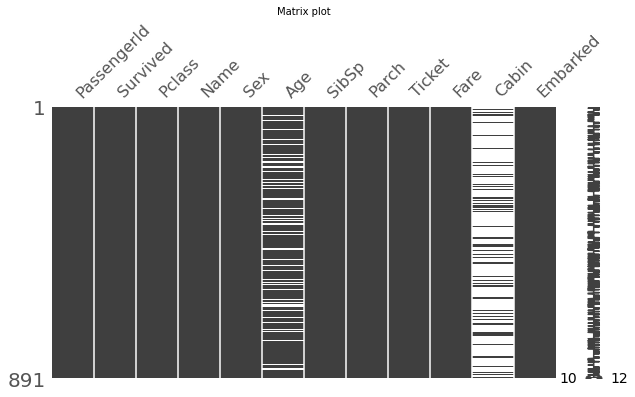

In [12]:
ms.matrix(train_df,figsize=(10,5))
plt.title("Matrix plot",size=10)

Text(0.5, 1.0, 'Bar plot')

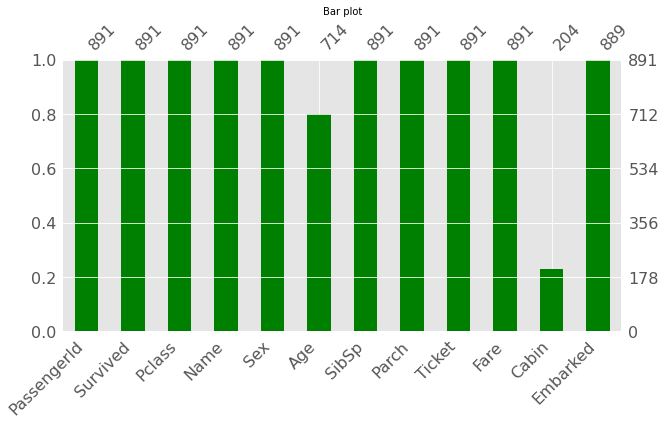

In [13]:
ms.bar(train_df,figsize=(10,5),color='g')
plt.title("Bar plot",size=10)

# || Replace missing values with Mean Value ||

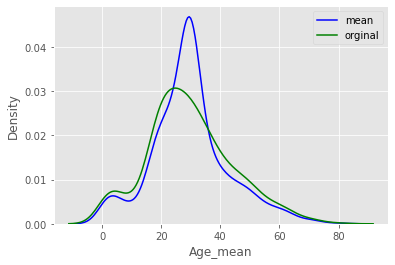

In [14]:
# first we compare between the curve for initial value and replaced with mean-value
train_df["Age_mean"] = train_df["Age"].fillna(train_df["Age"].mean())

# Checking diffrence of curve between between replaced and original value
sns.kdeplot(train_df["Age_mean"], color='blue', label='mean')
sns.kdeplot(train_df['Age'],color='green', label='orginal')
plt.legend()

In [15]:
# finally we replaced wtih Mean
train_df.drop(["Age_mean"],axis=1,inplace=True)

train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

print("number of missing values remained in columns 'Age' of train data is ",train_df["Age"].isnull().sum(),'.')
print("number of missing values remained in columns 'Age' of test data is" ,test_df["Age"].isnull().sum(),'.')

number of missing values remained in columns 'Age' of train data is  0 .
number of missing values remained in columns 'Age' of test data is 0 .


# || Drop unnecessary columns ||

In [16]:
# Drop the 'cabin' columns from dataset as it explain the highest percentage of missing value 
# also we drop name and ticket column as they are irrelevant our analysis
train_df.drop(['Cabin','Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)
    
test_df.drop(['Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [17]:
train_df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S


# || Analysis with visulisation ||


In [18]:
 #value count Survived / Not Survived
pd.DataFrame({' ' :['Not Survived','Survived'],'Value Counts': train_df['Survived']
              .value_counts(),'Percentage(%)':[(train_df["Survived"]==0).sum()*100/len(train_df),(train_df["Survived"]==1)
                                              .sum()*100/len(train_df)]}).set_index(' ').head()

,Value Counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


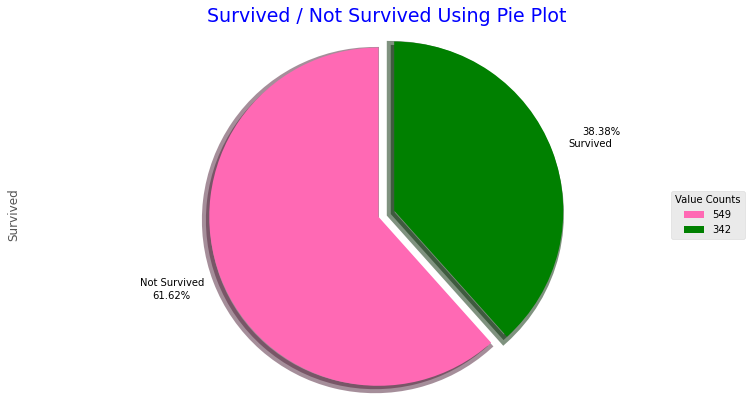

In [19]:
train_df["Survived"].value_counts().plot(kind='pie', figsize=(13,7), startangle=90,autopct='%1.2f%%',
                                        shadow=True, labels=["Not Survived","Survived"],pctdistance=1.31,
                                        wedgeprops = {'linewidth':8},
                                         colors=["hotpink", "green"],explode=[0.1,0])
plt.title("Survived / Not Survived Using Pie Plot", c='b', size=19,y=0.99)
plt.axis("Equal")
plt.legend(title="Value Counts",labels=train_df["Survived"].value_counts(),loc="center right")

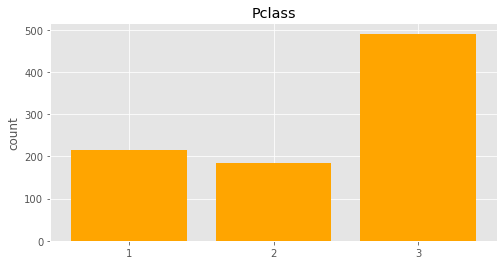

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64


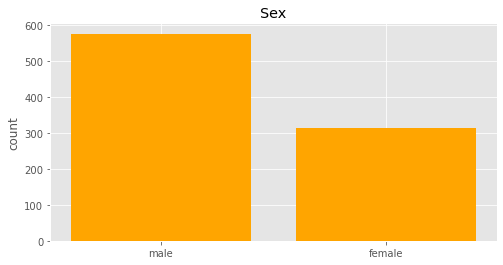

Sex 
male      577
female    314
Name: Sex, dtype: int64


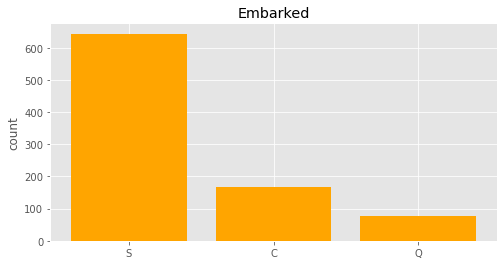

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


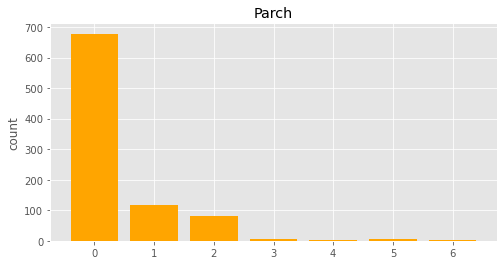

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


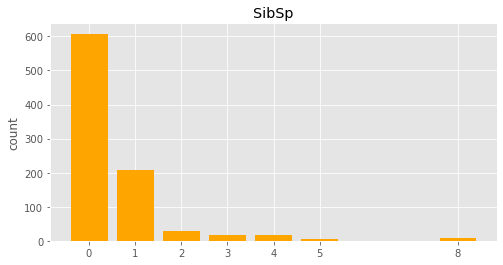

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [20]:
#creating functions for bar plot visulisation
def Bar_graph(features):
    feature = train_df[features];
    feature_val = feature.value_counts();
    
    plt.figure(figsize=(8,4));
    plt.bar(feature_val.index,feature_val,color='orange');
    plt.title(features);
    plt.xticks(feature_val.index,feature_val.index.values);
    plt.ylabel('count');
    plt.show()
    print("{} \n{}".format(features,feature_val));
    
cols = ["Pclass","Sex","Embarked","Parch","SibSp"]
for i in cols:
    Bar_graph(i)

# || Cross Table ||

In [21]:
pd.crosstab(train_df["Survived"],train_df["Pclass"],margins=True,margins_name="total")

Pclass,1,2,3,total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
total,216,184,491,891


In [22]:
pd.crosstab(train_df["Survived"],train_df["Sex"],margins=True,margins_name="total")

Sex,female,male,total
Survived,,,
0,81,468,549
1,233,109,342
total,314,577,891


In [23]:
pd.crosstab(train_df["Survived"],train_df["SibSp"],margins=True,margins_name="total")

SibSp,0,1,2,3,4,5,8,total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
total,608,209,28,16,18,5,7,891


# || Data preparaton for fitting Model ||

In [24]:
from sklearn.model_selection import train_test_split   # Split data train & test
from sklearn.preprocessing import StandardScaler        # Scale data values
from sklearn.preprocessing import LabelEncoder          # For catogrical columns

In [25]:
lb = LabelEncoder()

train_df["Sex"] = lb.fit_transform(train_df["Sex"].values)
train_df["Embarked"] = lb.fit_transform(train_df["Embarked"].values)

test_df["Sex"] = lb.fit_transform(test_df["Sex"].values)
test_df["Embarked"] = lb.fit_transform(test_df["Embarked"].values)

In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [27]:
X_train = train_df.iloc[:,1:7]
Y_train = train_df.loc[:,'Survived']
X_test  = test_df.drop('PassengerId', axis=1)

In [28]:
sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)
X_test  = sc_object.transform(X_test)

# Libraries for Different Machine Learning Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# LOGISTIC REGRESSION MODEL
l_regression = LogisticRegression()
l_regression.fit(X_train, Y_train)
l_score = round(l_regression.score(X_train,Y_train) * 100,2)
print("Accuracy for logistic regression model is :",l_score)

# DECISION TREE CLASSIFIER
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)
dtree_score = round(d_tree.score(X_train,Y_train) * 100,2)
print("Accuracy for Decision Tree Classifier model is :",dtree_score)

# RANDOM FOREST CLASSIFIER
r_forest = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0)
r_forest.fit(X_train, Y_train)
rf_score = round(r_forest.score(X_train,Y_train) * 100,2)
print("Accuracy for Random forest model is :",rf_score)

#SVC
svc = SVC(kernel='rbf',random_state=0)
svc.fit(X_train,Y_train)
svc_score = round(svc.score(X_train,Y_train) * 100, 2)
print("ACCURACY FOR SVC IS:",svc_score)


# GAUSSIANNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_score = round(nb.score(X_train,Y_train)* 100 ,2)
print("ACCURACY FOR NAIVE BAYES MODEL IS:",nb_score)

# K NEAREST NEIGHBOUR
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2)
knn.fit(X_train,Y_train)
knn_score = round(knn.score(X_train,Y_train)* 100,2)
print("ACCURACY FOR K-NN MODEL IS ",knn_score)

Accuracy for logistic regression model is : 80.36
Accuracy for Decision Tree Classifier model is : 93.71
Accuracy for Random forest model is : 93.71
ACCURACY FOR SVC IS: 84.4
ACCURACY FOR NAIVE BAYES MODEL IS: 79.24
ACCURACY FOR K-NN MODEL IS  86.98


In [31]:
selection = pd.DataFrame({'Models':['Logistic','Descion tree','Random forest','Svc','GaussianNB','KNN'],
                          'Accuracy values':[l_score,dtree_score,rf_score,svc_score,nb_score,knn_score]})
selection.sort_values(by='Accuracy values',ascending=False)

,Models,Accuracy values
1,Descion tree,93.71
2,Random forest,93.71
5,KNN,86.98
3,Svc,84.40
0,Logistic,80.36
4,GaussianNB,79.24


Text(0.5, 1.0, 'Bar plot for comapring score from diffrent models')

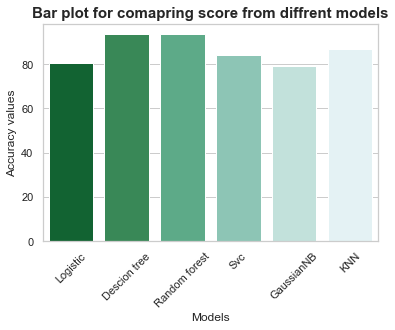

In [35]:
sns.set_theme(style='whitegrid')
sns.barplot(x='Models',y='Accuracy values',data=selection,palette='BuGn_r');
plt.xticks(rotation=45)
plt.title('Bar plot for comapring score from diffrent models',weight='bold',size=15)

#    || prediction || 

In [42]:
final_prediction=r_forest.predict(X_test)

In [45]:
odf = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':final_prediction})
odf.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [46]:
odf.to_csv('Survial_Predction_of_titanic_data.csv',index=False)